In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
pwd

'C:\\Users\\Akhil S R'

In [2]:
df = pd.read_csv('C:\\Users\\Akhil S R\\Downloads\\20710_26737_bundle_archive\\Bengaluru_House_Data.csv')

In [3]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [4]:
len(df)

13320

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.drop(['availability','society','area_type'],axis = 'columns',inplace = True)

In [7]:
df = df.dropna()

In [8]:
df['bhk'] = df['size'].apply(lambda x:int(x.split(' ')[0]))

In [9]:
len(df)

12710

In [19]:
dummies = pd.get_dummies(df.location)
dummies['Anekal'].unique()

array([0, 1], dtype=uint64)

In [20]:
df.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [21]:
df.drop(['size'],axis = 1,inplace = True)

In [22]:
df.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [23]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [24]:
def convert_to_number_only(y):
    x = y.split("-")
    if len(x) == 2:
        return((float(x[0]) + float(x[1]))/2)
    try:
        return(float(x[0]))
    except:
        return(None)

In [25]:
df2 = df.copy()
df2['total_sqft'] = df['total_sqft'].apply(convert_to_number_only)

In [26]:
convert_to_number_only('555 - 333')

444.0

In [27]:
df2.dropna(inplace = True)

In [28]:
df2.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [29]:
df2

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [30]:
df2['price_per_sqft'] =df2['price']/df2['total_sqft']

In [31]:
df2['price_per_sqft'] = df2['price_per_sqft']*100000

In [32]:
df2['price_per_sqft'].unique()

array([ 3699.81060606,  4615.38461538,  4305.55555556, ...,
        6689.83492615,  5258.54513585, 10407.33631904])

In [33]:
df2.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


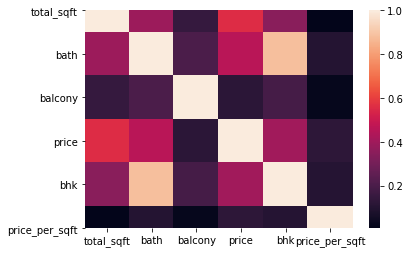

In [34]:

sns.heatmap(df2.corr())


(6.0, 0.0)

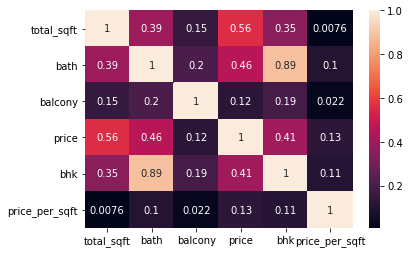

In [35]:
ax = sns.heatmap(df2.corr(), annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [36]:
df2['location'] = df2['location'].apply(lambda x:x.strip())


In [37]:
x =df2.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [38]:
len(x)

1248

In [39]:
df2[df2['total_sqft']/df2['bhk']<300].head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,Double Road,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.211268


In [40]:
locationlessthan10 = x[x<=10]

In [41]:
len(locationlessthan10)

1013

In [42]:
df2.location = df2.location.apply(lambda x:'outlier' if x in locationlessthan10 else x)

In [43]:
len(df2.location.unique())

236

In [44]:
len(df2[df2['total_sqft']/df2['bhk']<300])

655

In [45]:
df3 = df2[~(df2['total_sqft']/df2['bhk']<300)]

In [46]:
df3.shape

(12013, 7)

In [47]:
df2.shape

(12668, 7)

In [48]:
df3.head(10)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,1800.0,2.0,2.0,70.00,3,3888.888889
11,Whitefield,2785.0,5.0,3.0,295.00,4,10592.459605
12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2,3800.000000


In [49]:
df3.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,12013.000000,12013.000000,12013.000000,12013.000000,12013.000000,12013.000000
mean,1542.315982,2.511779,1.587613,105.003648,2.607259,6206.082347
std,1181.094228,1.006207,0.808867,134.205666,0.922985,3985.518807
min,300.000000,1.000000,0.000000,9.000000,1.000000,267.829813
25%,1107.000000,2.000000,1.000000,48.450000,2.000000,4199.363057
50%,1285.000000,2.000000,2.000000,68.000000,2.000000,5252.525253
75%,1660.000000,3.000000,2.000000,110.000000,3.000000,6823.529412
max,52272.000000,13.000000,3.000000,2912.000000,13.000000,176470.588235


In [50]:
x = df3.loc[df3['location'] =='outlier']

In [51]:
x.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,1665.526622,2.606504,1.583740,132.995549,2.718293,7290.281127
std,1804.728721,1.119006,0.862143,197.933256,1.077285,6149.105000
min,375.000000,1.000000,0.000000,10.000000,1.000000,267.829813
25%,1100.000000,2.000000,1.000000,51.000000,2.000000,4333.333333
50%,1300.000000,2.000000,2.000000,75.000000,3.000000,5500.000000
75%,1750.000000,3.000000,2.000000,140.000000,3.000000,8078.801384
max,52272.000000,13.000000,3.000000,2912.000000,13.000000,176470.588235


In [52]:
df2.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,12668.000000,12668.000000,12668.000000,12668.000000,12668.000000,1.266800e+04
mean,1511.835167,2.616277,1.585649,105.952648,2.736422,6.876277e+03
std,1162.097276,1.223882,0.816758,131.813137,1.202643,2.263354e+04
min,5.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,49.015000,2.000000,4.242721e+03
50%,1260.000000,2.000000,2.000000,70.000000,3.000000,5.376344e+03
75%,1640.000000,3.000000,2.000000,115.000000,3.000000,7.142857e+03
max,52272.000000,40.000000,3.000000,2912.000000,43.000000,2.300000e+06


In [53]:
indexNames = df3[ df3['location'] == 'outlier' ].index

In [54]:
df3.drop(indexNames , inplace=True)

C:\Users\Akhil S R\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
df3.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,9553.000000,9553.000000,9553.000000,9553.000000,9553.000000,9553.000000
mean,1510.587921,2.487386,1.588611,97.795433,2.578666,5926.889528
std,954.388258,0.973622,0.794614,110.952047,0.876666,3140.153934
min,300.000000,1.000000,0.000000,9.000000,1.000000,371.428571
25%,1108.000000,2.000000,1.000000,48.000000,2.000000,4171.311475
50%,1280.000000,2.000000,2.000000,67.000000,2.000000,5208.333333
75%,1650.000000,3.000000,2.000000,105.000000,3.000000,6666.666667
max,36000.000000,10.000000,3.000000,2250.000000,10.000000,76530.612245


In [56]:
df3[df3['price_per_sqft'] == 76530.612245 ]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft


(6.0, 0.0)

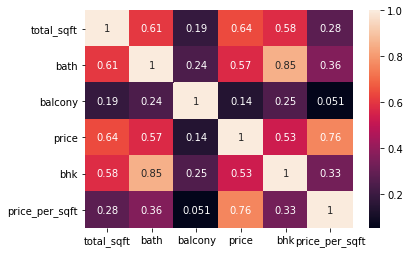

In [57]:
ax = sns.heatmap(df3.corr(), annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [58]:
df3.drop(['balcony'],axis = 1,inplace = True)

(5.0, 0.0)

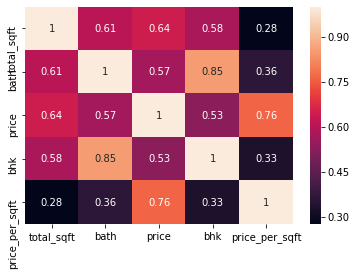

In [59]:
ax = sns.heatmap(df3.corr(), annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [60]:
df4 = (df3[~(df3['total_sqft']/(df3['bath']+df3['bhk'])<200)])

In [61]:
(df3[df3['total_sqft']/(df3['bath']+df3['bhk'])<200])

,location,total_sqft,bath,price,bhk,price_per_sqft
16,Bisuvanahalli,1180.0,3.0,48.0,3,4067.796610
35,Kanakpura Road,700.0,2.0,36.0,2,5142.857143
64,Bommanahalli,3000.0,8.0,140.0,8,4666.666667
84,EPIP Zone,1499.0,5.0,102.0,3,6804.536358
87,Dasanapura,708.0,2.0,37.0,2,5225.988701
...,...,...,...,...,...,...
12936,Whitefield,1344.0,3.0,130.0,4,9672.619048
12963,Uttarahalli,1200.0,4.0,155.0,4,12916.666667
13126,Akshaya Nagar,1200.0,4.0,125.0,4,10416.666667
13138,Electronic City,750.0,2.0,19.5,2,2600.000000


(5.0, 0.0)

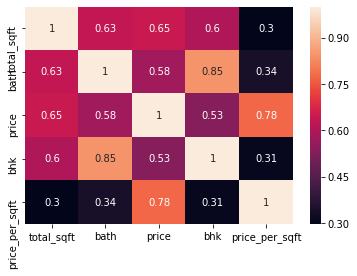

In [62]:
ax = sns.heatmap(df4.corr(), annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [63]:
df4.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,9251.000000,9251.000000,9251.000000,9251.000000,9251.000000
mean,1523.283582,2.458977,97.573582,2.555508,5838.312006
std,963.647939,0.939418,111.700677,0.845608,3015.843740
min,400.000000,1.000000,9.000000,1.000000,371.428571
25%,1115.000000,2.000000,48.000000,2.000000,4161.428515
50%,1290.000000,2.000000,67.000000,2.000000,5194.805195
75%,1660.000000,3.000000,104.000000,3.000000,6603.342943
max,36000.000000,10.000000,2250.000000,10.000000,76530.612245


(5.0, 0.0)

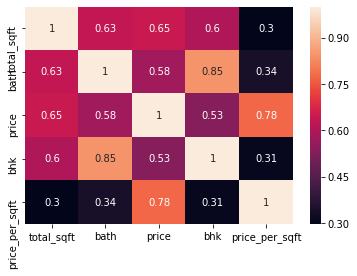

In [64]:
ax = sns.heatmap(df4.corr(), annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(-3436.047306505384, 80338.08812283192)

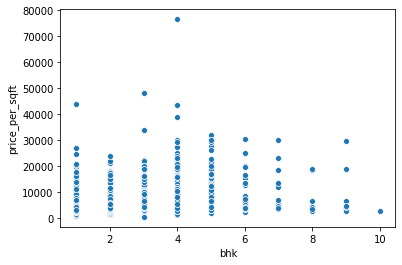

In [65]:
ax= sns.scatterplot(x=df4.bhk,y=df4.price_per_sqft,data=df4)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [66]:
df4

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [67]:
x = df4.price[df4.bhk==3]

In [68]:
np.mean(x)


104.76977272727261

In [69]:
y = df4.price[df4.bhk==2]
len(y)

4328

In [70]:
ymean = np.mean(y)
ymean

58.88555221811458

In [71]:
x = np.array(x)
len(x)

3586

In [72]:
summ = 0
for i in (x):
    if i < ymean:
        summ+=1
print(summ)

698


In [73]:
df5 = df4.price[df4.bhk==3].apply(lambda x: x if x>ymean else None)

In [74]:
df5.isnull().sum()

698

In [75]:
df4.price[df4.bhk==3]

2         62.00
3         95.00
8         63.25
10        70.00
14       148.00
          ...  
13301     71.50
13307    134.00
13308    142.00
13313     57.00
13314    112.00
Name: price, Length: 3586, dtype: float64

In [76]:
df3.location


0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13314           Green Glen Layout
13315                  Whitefield
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 9553, dtype: object

In [86]:
dummies = pd.get_dummies(df4.location)

In [87]:
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
dummies.loc[dummies['1st Block Jayanagar'] == 1]

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2355,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4991,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7383,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10972,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df5 = pd.concat([df4,dummies],axis = 'columns')

In [97]:
df5.drop('location',axis = 1,inplace = True)

In [98]:
df5

,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,4615.384615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,1715.0,3.0,112.00,3,6530.612245,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,3453.0,4.0,231.00,5,6689.834926,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13317,1141.0,2.0,60.00,2,5258.545136,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4689.0,4.0,488.00,4,10407.336319,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
y = df5.price

In [ ]:
df5.drop('price',axis = 1,inplace = True)

In [104]:
X=df5

In [105]:
X


,total_sqft,bath,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,2,3699.810606,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,4,4615.384615,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,4305.555556,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,6245.890861,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,4250.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,1715.0,3.0,3,6530.612245,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,3453.0,4.0,5,6689.834926,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13317,1141.0,2.0,2,5258.545136,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4689.0,4.0,4,10407.336319,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
predictions = model.predict(X_test)
predictions

array([ 35.6131073 ,  24.24668043, 209.10004664, ...,  -0.37302827,
       106.19551717, 150.19164814])

In [121]:
y_test = np.array(y_test)

In [123]:
model.score(X_test,y_test)

0.8188064034513851

In [131]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size = 0.2,random_state = 0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.86830225, 0.83804061, 0.74890111, 0.81453679, 0.84441915])

In [133]:
import selenium

ModuleNotFoundError: No module named 'selenium'